In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

import warnings 
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from scipy.stats.mstats import winsorize
from sklearn.model_selection import KFold

from sklearn.preprocessing import MinMaxScaler

In [2]:
#ccard_bal=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/credit_card_balance.csv')
#description_table=pd.read_csv('/Users/naimboraatlay/Desktop/ppi_ag/bootcamp/datasets/home-credit-default-risk/home_credit_columns_description.csv', encoding='ISO-8859-1', index_col=0)

In [ ]:
ccard_bal=pd.read_csv('data/credit_card_balance.csv')
description_table=pd.read_csv('data/home_credit_columns_description.csv', encoding='ISO-8859-1', index_col=0)

In [110]:
#description_table = description_table.reset_index()
#del description_table["index"]

In [111]:
#Credit Card indices are 150-173/
#description_table.iloc[150:173,:]

In [112]:
#ccard_bal.shape

In [113]:
#ccard_bal.isna().sum()

In [114]:
#ccard_bal.SK_ID_CURR.nunique()

In [115]:
#ccard_bal.info()

#### CREATING A DATAFRAME WITH MEAN VALUES GROUPED BY SK_ID_CURR FOR DATA EXPLORATION

In [3]:
ccard_bal_mean = ccard_bal.groupby("SK_ID_CURR").mean().reset_index()

<AxesSubplot:xlabel='AMT_INST_MIN_REGULARITY', ylabel='AMT_PAYMENT_TOTAL_CURRENT'>

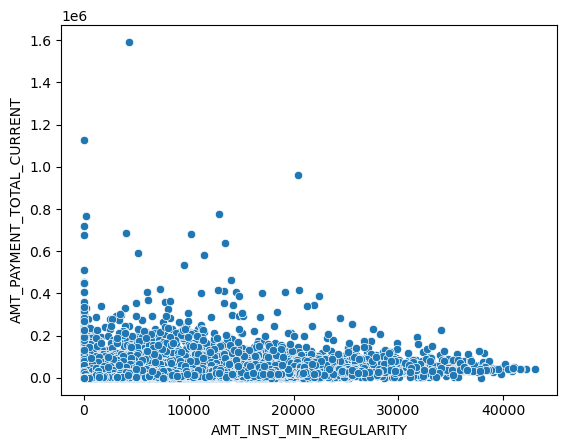

In [4]:
sns.scatterplot(data=ccard_bal_mean, x="AMT_INST_MIN_REGULARITY", y="AMT_PAYMENT_TOTAL_CURRENT")

<AxesSubplot:xlabel='AMT_BALANCE', ylabel='AMT_CREDIT_LIMIT_ACTUAL'>

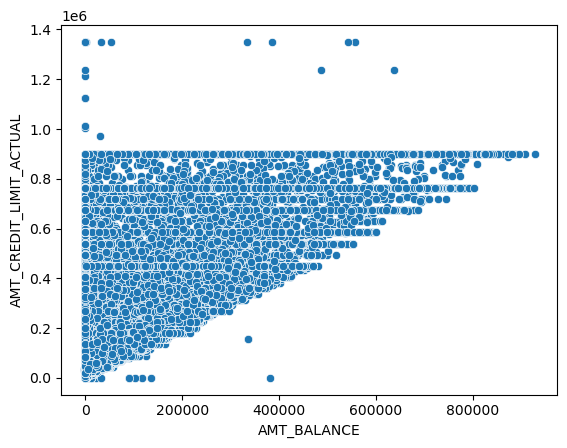

In [5]:
sns.scatterplot(data=ccard_bal_mean, x="AMT_BALANCE", y="AMT_CREDIT_LIMIT_ACTUAL")

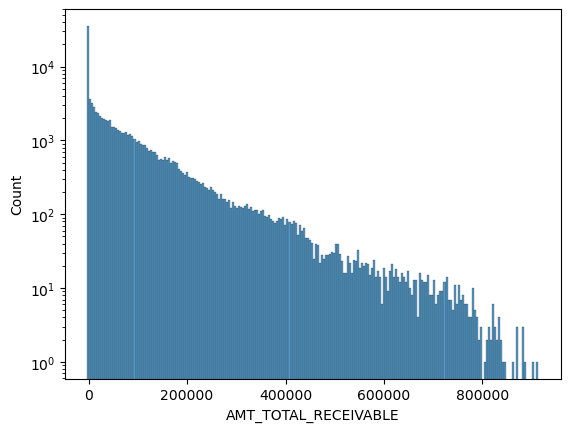

In [6]:
rec_histplt = sns.histplot(data=ccard_bal_mean, x="AMT_TOTAL_RECEIVABLE")
rec_histplt.axes.set_yscale('log')

<AxesSubplot:xlabel='AMT_TOTAL_RECEIVABLE', ylabel='AMT_RECEIVABLE_PRINCIPAL'>

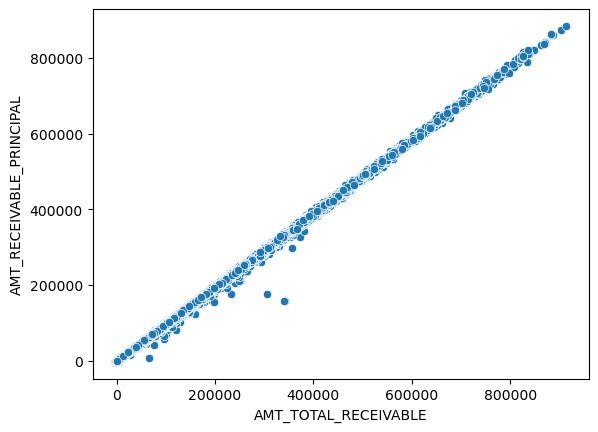

In [7]:
sns.scatterplot(data=ccard_bal_mean, x="AMT_TOTAL_RECEIVABLE", y="AMT_RECEIVABLE_PRINCIPAL")

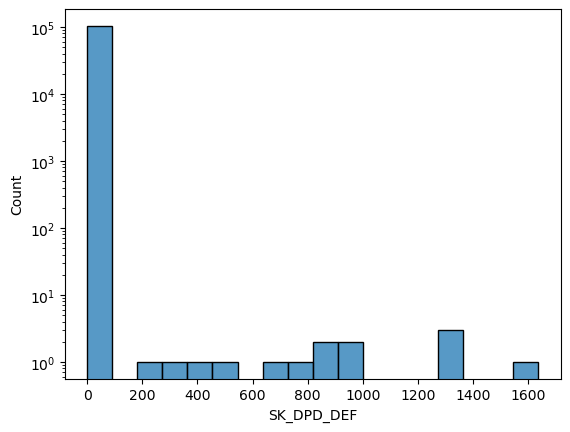

In [8]:
dpd_histplt = sns.histplot(data=ccard_bal_mean, x="SK_DPD_DEF")
dpd_histplt.axes.set_yscale('log')

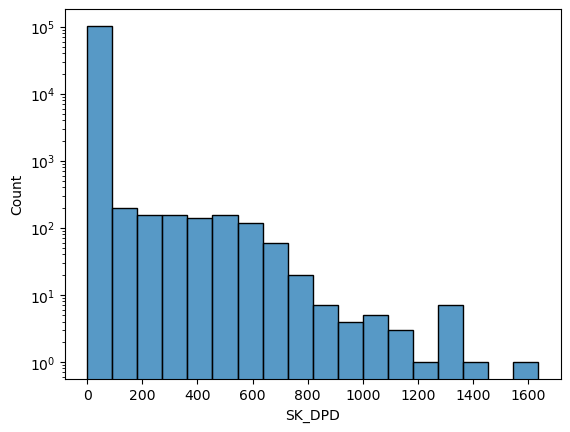

In [9]:
dpd_histplt = sns.histplot(data=ccard_bal_mean, x="SK_DPD")
dpd_histplt.axes.set_yscale('log')

In [10]:
ccard_bal_mean["SK_DPD_DEF"].describe()

count    103558.000000
mean          0.151713
std          11.105665
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1635.684783
Name: SK_DPD_DEF, dtype: float64

<AxesSubplot:xlabel='SK_DPD', ylabel='SK_DPD_DEF'>

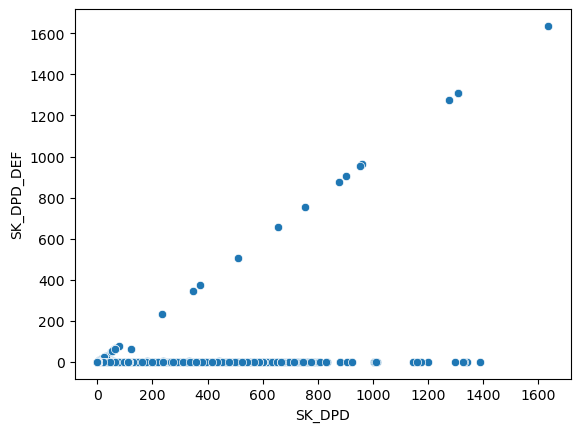

In [11]:
sns.scatterplot(data=ccard_bal_mean, x="SK_DPD", y="SK_DPD_DEF")

In [12]:
#ccard_bal_363914 = ccard_bal[ccard_bal['SK_ID_CURR'] == 363914]
#ccard_bal_456247 = ccard_bal[ccard_bal['SK_ID_CURR'] == 456247]

#### Replacing the NaN amt_min_inst values with the first month

In [116]:
#min_inst = pd.DataFrame(ccard_bal.loc[ccard_bal.groupby('SK_ID_CURR').MONTHS_BALANCE.idxmin()]["AMT_INST_MIN_REGULARITY"])

In [117]:
#min_inst_idx = ccard_bal.loc[ccard_bal.groupby('SK_ID_CURR').MONTHS_BALANCE.idxmin()]["AMT_INST_MIN_REGULARITY"].index

In [118]:
#len(min_inst_idx)

In [13]:
ccard_bal.drop(np.isnan(ccard_bal.loc[ccard_bal.groupby('SK_ID_CURR').MONTHS_BALANCE.idxmin()]["AMT_INST_MIN_REGULARITY"]).index, inplace = True)

In [160]:
#ccard_bal_363914 = ccard_bal[ccard_bal['SK_ID_CURR'] == 363914]
#ccard_bal_456247 = ccard_bal[ccard_bal['SK_ID_CURR'] == 456247]

In [120]:
#ccard_bal["AMT_INST_MIN_REGULARITY"].fillna(method="bfill", inplace=True)

In [51]:
#del ccard_bal["MIN_INST_PAYMENT_RAT"]

In [14]:
ccard_bal.loc[ccard_bal['AMT_INST_MIN_REGULARITY'] == 0., 'AMT_INST_MIN_REGULARITY'] = 0.01
ccard_bal.loc[ccard_bal['AMT_PAYMENT_TOTAL_CURRENT'] == 0., 'AMT_PAYMENT_TOTAL_CURRENT'] = 0.01

In [15]:
ccard_bal["MIN_INST_PAYMENT_RAT"] = ccard_bal["AMT_INST_MIN_REGULARITY"]/ccard_bal["AMT_PAYMENT_TOTAL_CURRENT"]

In [17]:
#ccard_bal[["AMT_INST_MIN_REGULARITY", "AMT_PAYMENT_TOTAL_CURRENT", "MIN_INST_PAYMENT_RAT"]]

In [18]:
#del ccard_bal["AMT_RECEIVABLE_RAT"]

In [19]:
ccard_bal.loc[ccard_bal['AMT_RECIVABLE'] == 0., 'AMT_RECIVABLE'] = 0.01
ccard_bal.loc[ccard_bal['AMT_RECEIVABLE_PRINCIPAL'] == 0., 'AMT_RECEIVABLE_PRINCIPAL'] = 0.01

In [20]:
ccard_bal["AMT_RECEIVABLE_RAT"] = ccard_bal["AMT_RECIVABLE"]/ccard_bal["AMT_RECEIVABLE_PRINCIPAL"]

In [21]:
#ccard_bal[["MIN_INST_PAYMENT_RAT"]].describe()

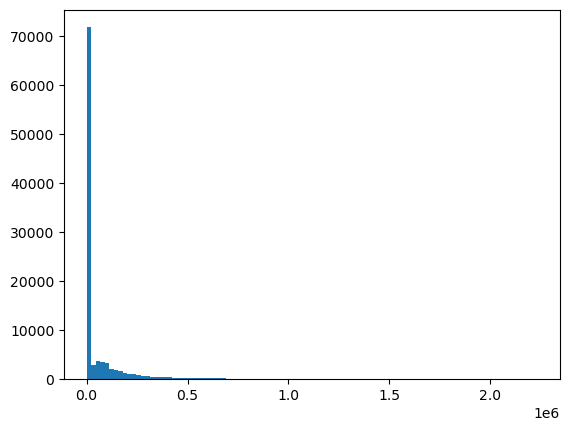

In [22]:
plt.hist(ccard_bal.groupby('SK_ID_CURR').MIN_INST_PAYMENT_RAT.std(), bins=100)
plt.show()

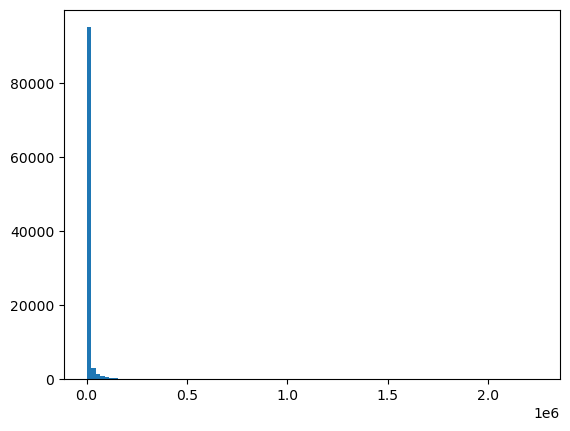

In [23]:
plt.hist(ccard_bal.groupby('SK_ID_CURR').AMT_RECEIVABLE_RAT.std(), bins=100)
plt.show()

In [24]:
#ccard_bal.AMT_RECEIVABLE_RAT.describe()

In [27]:
#sns.scatterplot(data=ccard_bal, x="MONTHS_BALANCE", y="AMT_BALANCE")
#sns.scatterplot(data=ccard_bal, x="MONTHS_BALANCE", y="AMT_DRAWINGS_ATM_CURRENT")
#sns.scatterplot(data=ccard_bal, x="MONTHS_BALANCE", y="AMT_DRAWINGS_CURRENT")
#plt.legend(labels=["AMT_BALANCE", "AMT_DRAWINGS_ATM_CURRENT", "AMT_DRAWINGS_CURRENT"])
#plt.show()

In [28]:
df_ccard = ccard_bal[["SK_ID_PREV", "SK_ID_CURR", "SK_DPD", "AMT_RECEIVABLE_RAT", "MIN_INST_PAYMENT_RAT"]]

In [29]:
df_ccard.head()

,SK_ID_PREV,SK_ID_CURR,SK_DPD,AMT_RECEIVABLE_RAT,MIN_INST_PAYMENT_RAT
0,2562384,378907,0,1.000000,0.944625
1,2582071,363914,0,1.078113,1.000000
2,1740877,371185,0,1.168372,1.000000
3,1389973,337855,0,1.036007,0.989162
4,1891521,126868,0,1.024546,0.849070


In [30]:
#df_ccard_agg = df_ccard.groupby('SK_ID_CURR').agg({'SK_DPD':'mean', 
#                                                   'AMT_RECEIVABLE_RAT':'std', 
#                                                   'MIN_INST_PAYMENT_RAT':'std'})

In [31]:
df_ccard_agg = df_ccard.groupby(['SK_ID_CURR', 'SK_ID_PREV']).agg({'SK_DPD':'mean', 
                                                   'AMT_RECEIVABLE_RAT':'std', 
                                                   'MIN_INST_PAYMENT_RAT':'std'}).groupby('SK_ID_CURR').agg(np.mean)

In [32]:
df_ccard_agg.shape

(102866, 3)

In [33]:
df_ccard_agg.reset_index()

,SK_ID_CURR,SK_DPD,AMT_RECEIVABLE_RAT,MIN_INST_PAYMENT_RAT
0,100006,0.000000,0.000000,0.000000
1,100011,0.000000,14328.535084,9412.274858
2,100013,0.010526,7658.652239,85073.813499
3,100021,0.000000,0.000000,0.000000
4,100023,0.000000,0.000000,0.000000
...,...,...,...,...
102861,456244,0.000000,0.012612,0.431107
102862,456246,0.000000,0.000877,4932.369147
102863,456247,0.021277,14647.499263,94760.073540
102864,456248,0.000000,0.000000,0.000000


In [34]:
df_ccard_agg.isna().sum()

SK_DPD                    0
AMT_RECEIVABLE_RAT      877
MIN_INST_PAYMENT_RAT    877
dtype: int64

In [35]:
df_ccard_agg.dropna(inplace=True)

In [36]:
print(df_ccard_agg.isna().sum())
print(" ")
print(df_ccard_agg.shape)

SK_DPD                  0
AMT_RECEIVABLE_RAT      0
MIN_INST_PAYMENT_RAT    0
dtype: int64
 
(101989, 3)


In [37]:
minmax_scaler = MinMaxScaler()

df_ccard_agg[['SK_DPD','AMT_RECEIVABLE_RAT','MIN_INST_PAYMENT_RAT']] = minmax_scaler.fit_transform(df_ccard_agg[['SK_DPD','AMT_RECEIVABLE_RAT','MIN_INST_PAYMENT_RAT']])

In [41]:
df_ccard_agg.reset_index(inplace=True)

In [46]:
df_ccard_agg.head()

,SK_ID_CURR,SK_DPD,AMT_RECEIVABLE_RAT,MIN_INST_PAYMENT_RAT
0,100006,0.000000,0.000000,0.000000
1,100011,0.000000,0.006375,0.004211
2,100013,0.000006,0.003407,0.038061
3,100021,0.000000,0.000000,0.000000
4,100023,0.000000,0.000000,0.000000
